In [2]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2

ModuleNotFoundError: No module named 'skimage'

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def compare_images(imageA, imageB, title):
	dim = (min(len(imageA), len(imageB)), min(len(imageA[0]), len(imageB[0])))
	cv2.resize(imageA, dim)
	cv2.resize(imageB, dim)
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err


def compare_images(imageA, imageB, title):
  dim = (min(len(imageA), len(imageB)), min(len(imageA[0]), len(imageB[0])))
  imageA = cv2.resize(imageA, dim)
  imageB = cv2.resize(imageB, dim)
  m = mse(imageA, imageB)
  s = ssim(imageA, imageB)
	# setup the figure
  fig = plt.figure(title)
  plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")
  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")
  # show the images
  plt.show()

In [ ]:
import time

original = cv2.imread("/content/drive/MyDrive/Semantic Search Similarity/dataset/588.jpg")
contrast = cv2.imread("/content/drive/MyDrive/Semantic Search Similarity/dataset/592.jpg")
start = time.time()
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
dim = (min(len(original), len(contrast)), min(len(original[0]), len(contrast[0])))
original = cv2.resize(original, dim)
imageB = cv2.resize(contrast, dim)
s = ssim(original, imageB)

print("ssim time: ", time.time() - start)
# ssim time:  0.15939640998840332
# ssim time:  0.04247689247131348

ssim time:  0.04247689247131348


In [ ]:
# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread("/content/drive/MyDrive/Semantic Search Similarity/dataset/588.jpg")
contrast = cv2.imread("/content/drive/MyDrive/Semantic Search Similarity/dataset/592.jpg")
shopped = cv2.imread("/content/drive/MyDrive/Semantic Search Similarity/dataset/593.jpg")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

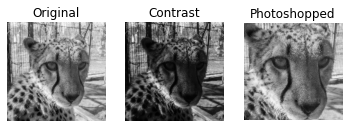

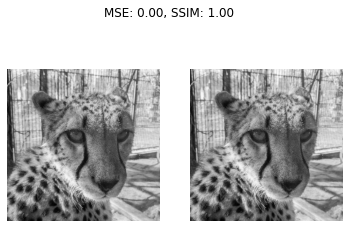

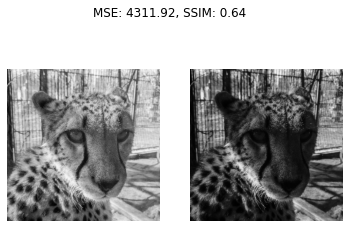

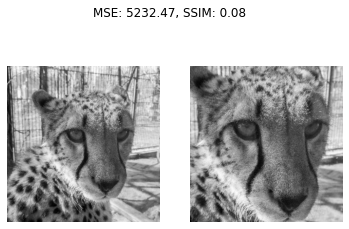

In [ ]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
print('')
compare_images(original, original, "Original vs. Original")
print('')
compare_images(original, contrast, "Original vs. Contrast")
print('')
compare_images(original, shopped, "Original vs. Photoshopped")


SIFT

In [ ]:
!pip install pysift

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2

# read the images
img1 = cv2.imread('/content/drive/MyDrive/Semantic Search Similarity/dataset/588.jpg')  
img2 = cv2.imread('/content/drive/MyDrive/Semantic Search Similarity/dataset/592.jpg')
# convert images to grayscale
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# create SIFT object
sift = cv2.xfeatures2d.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

In [ ]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_1,descriptors_2)

In [ ]:
# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

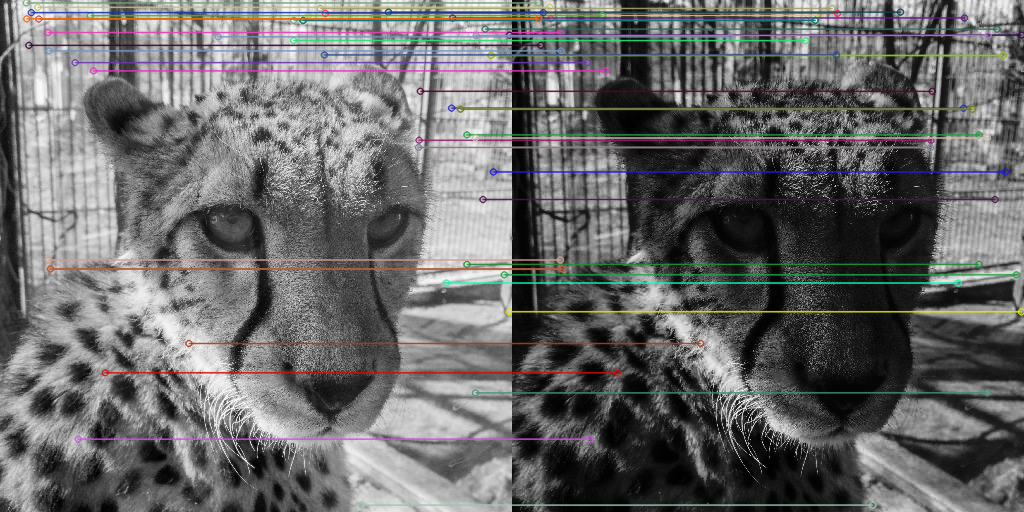

In [ ]:
from google.colab.patches import cv2_imshow

# show the image
cv2_imshow(matched_img)
# save the image
# cv2.imwrite("matched_images.jpg", matched_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
sum([match.distance for match in matches[:50]])/50

261.5

In [ ]:
import os
images_dir = '/content/drive/MyDrive/Semantic Search Similarity/dataset/'
images = []
for filename in os.listdir(images_dir):
    f = os.path.join(images_dir, filename)
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    images.append(img)

In [ ]:
def similarity_ssim(imageA, imageB):
  dim = (min(len(imageA), len(imageB)), min(len(imageA[0]), len(imageB[0])))
  imageA = cv2.resize(imageA, dim)
  imageB = cv2.resize(imageB, dim)
  # m = mse(imageA, imageB)
  s = ssim(imageA, imageB)
  return 1-s

In [ ]:
def similarity_sift(imageA, imageB):
  sift = cv2.xfeatures2d.SIFT_create()
  # detect SIFT features in both images
  keypoints_1, descriptors_1 = sift.detectAndCompute(imageA,None)
  keypoints_2, descriptors_2 = sift.detectAndCompute(imageB,None)
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
  # match descriptors of both images
  matches = bf.match(descriptors_1,descriptors_2)
  matches = sorted(matches, key = lambda x:x.distance)
  n = 50
  return sum([match.distance for match in matches[:n]])/n

In [ ]:
def find_similar(query_img, images, similarity, topk):
  topk = min(topk, len(images))

  similarities = [(similarity(query_img, img), i) for i, img in enumerate(images)]
  similarities.sort(key = lambda x:x[0])
  result = [idx for sim, idx in similarities[:topk]]
  return result

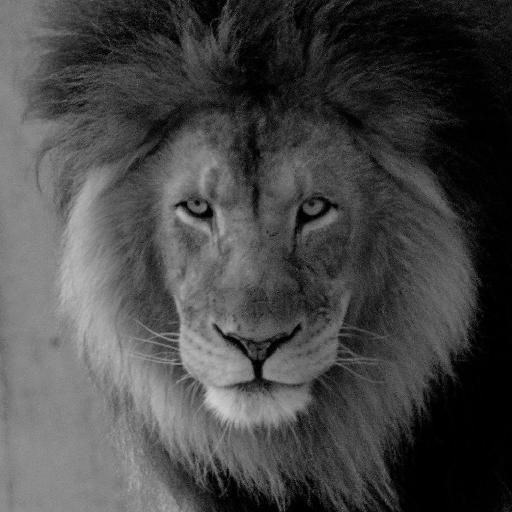

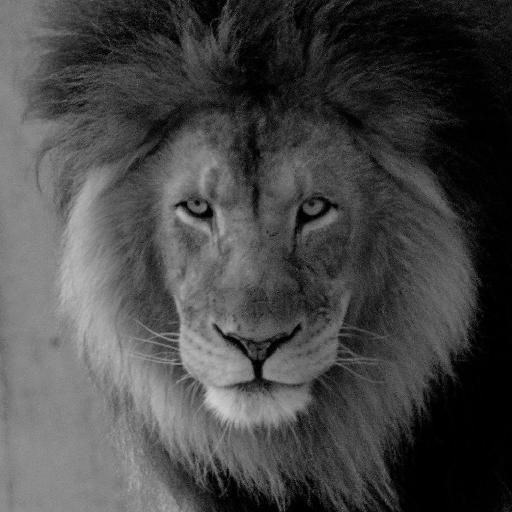

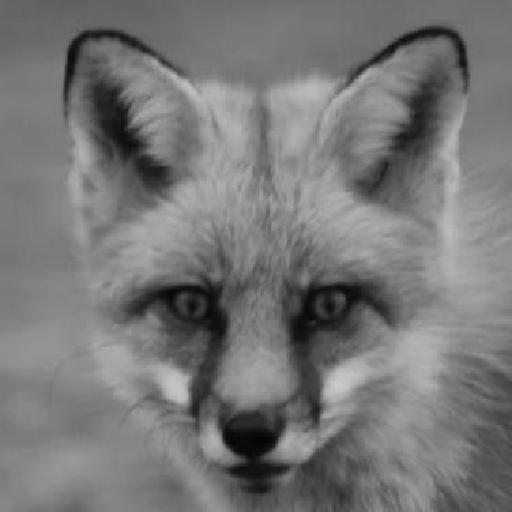

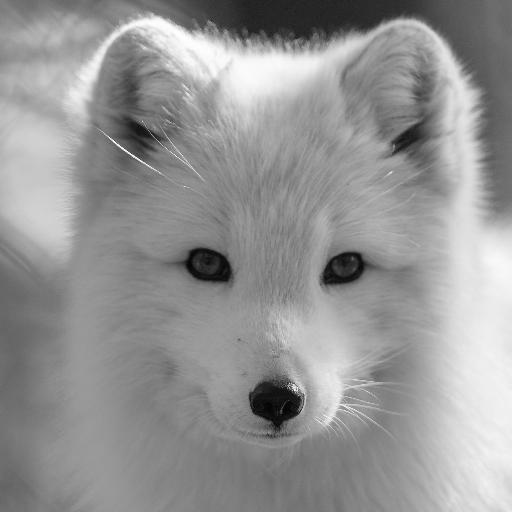

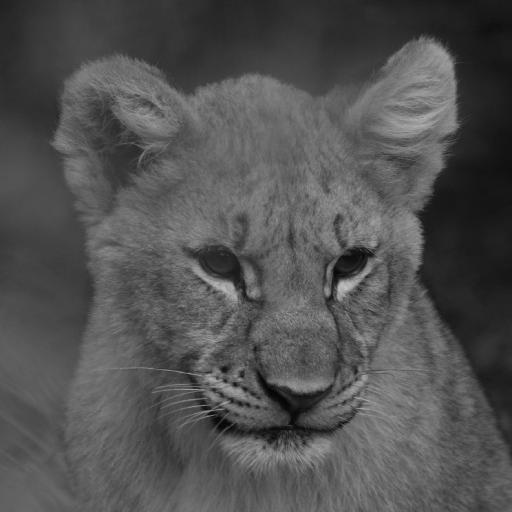

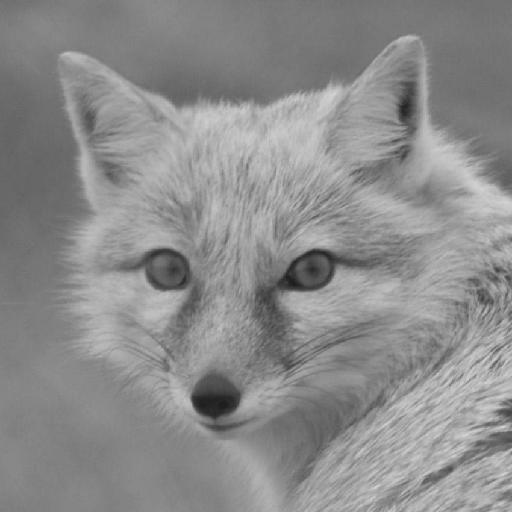

In [ ]:
from google.colab.patches import cv2_imshow
query_img = cv2.imread('/content/drive/MyDrive/Semantic Search Similarity/dataset/585.jpg')
query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)

similar_images = find_similar(query_img, images, similarity_ssim, 5)

cv2_imshow(query_img)
for idx in similar_images:
  cv2_imshow(images[idx])

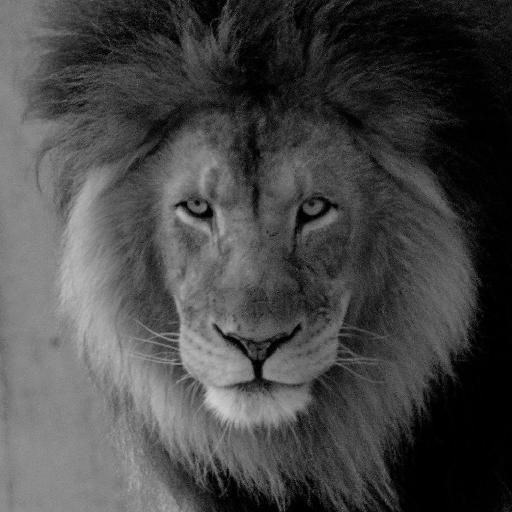

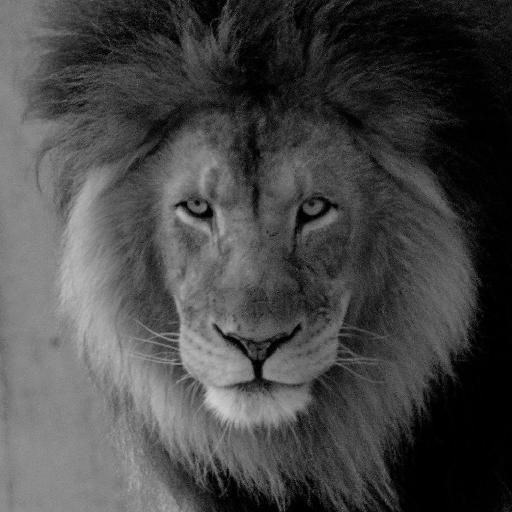

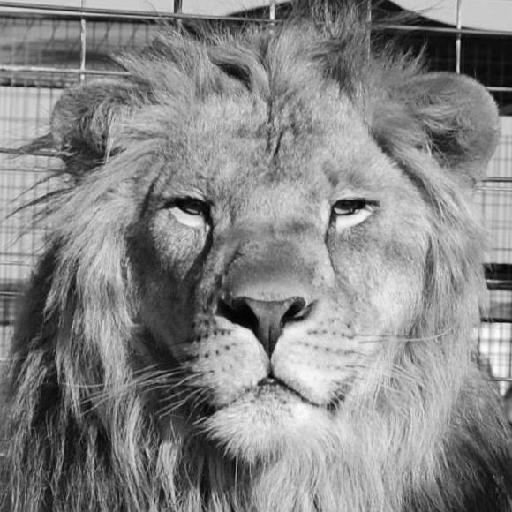

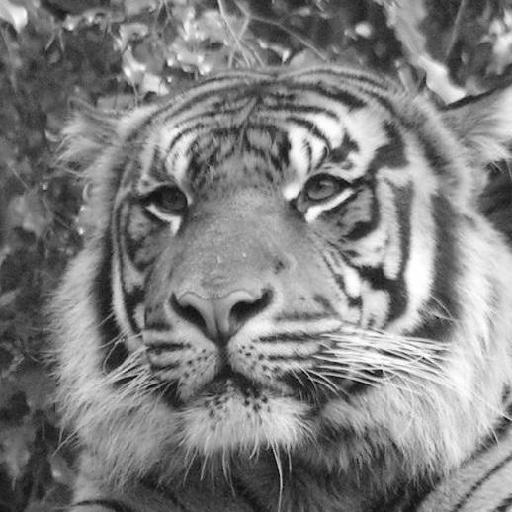

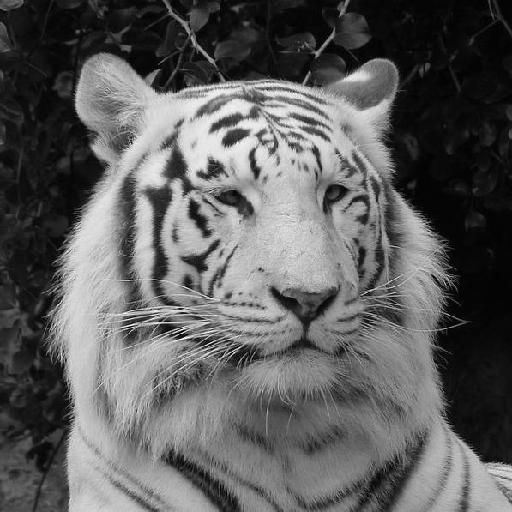

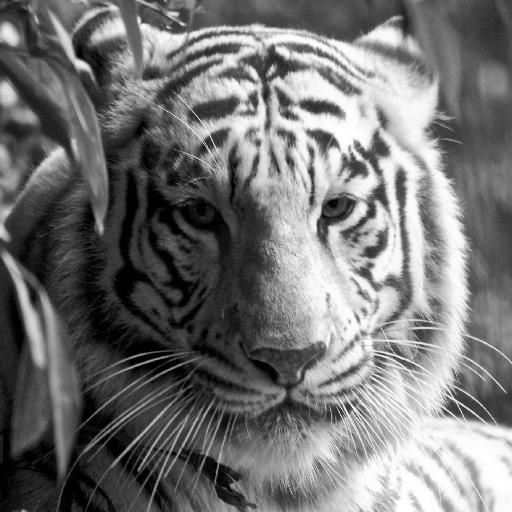

In [ ]:
query_img = cv2.imread('/content/drive/MyDrive/Semantic Search Similarity/dataset/585.jpg')
query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)

similar_images = find_similar(query_img, images, similarity_sift, 5)

cv2_imshow(query_img)
for idx in similar_images:
  cv2_imshow(images[idx])

# Resnet18

In [1]:
from torchvision import transforms, models
from PIL import Image
from tqdm import tqdm
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.testing import assert_almost_equal
import os

In [2]:
inputDir = '/content/drive/MyDrive/Semantic Search Similarity/dataset/'
inputDirCNN = '/content/drive/MyDrive/Semantic Search Similarity/datasetCNN/'
transformationForCNNInput = transforms.Compose([transforms.Resize((224,224))])
for imageName in os.listdir(inputDir):
    I = Image.open(os.path.join(inputDir, imageName))
    newI = transformationForCNNInput(I)

    if "exif" in I.info:
        exif = I.info['exif']
        newI.save(os.path.join(inputDirCNN, imageName), exif=exif)
    else:
        newI.save(os.path.join(inputDirCNN, imageName))

In [8]:
class Img2VecResnet18():
    def __init__(self):
        self.device = torch.device("cpu")
        self.numberFeatures = 512
        self.modelName = "resnet-18"
        self.model, self.featureLayer = self.getFeatureLayer()
        self.model = self.model.to(self.device)
        self.model.eval()
        self.toTensor = transforms.ToTensor()
        self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    def getFeatureLayer(self):
        cnnModel = models.resnet18(pretrained=True)
        layer = cnnModel._modules.get('avgpool')
        self.layer_output_size = 512
        
        return cnnModel, layer

    def getVec(self, img):
          image = self.normalize(self.toTensor(img)).unsqueeze(0).to(self.device)
          embedding = torch.zeros(1, self.numberFeatures, 1, 1)
          def copyData(m, i, o): embedding.copy_(o.data)
          h = self.featureLayer.register_forward_hook(copyData)
          self.model(image)
          h.remove()
          return embedding.numpy()[0, :, 0, 0]

In [9]:
img2vec = Img2VecResnet18()
allVectors = {}
for image in tqdm(os.listdir(inputDirCNN)):
    I = Image.open(os.path.join(inputDirCNN, image))
    vec = img2vec.getVec(I)
    allVectors[image] = vec
    I.close()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 593/593 [01:04<00:00,  9.24it/s]


In [10]:
def getSimilarityMatrix(vectors):
    v = np.array(list(vectors.values())).T
    sim = np.inner(v.T, v.T) / ((np.linalg.norm(v, axis=0).reshape(-1,1)) * ((np.linalg.norm(v, axis=0).reshape(-1,1)).T))
    keys = list(vectors.keys())
    matrix = pd.DataFrame(sim, columns = keys, index = keys)
    return matrix
    
similarityMatrix = getSimilarityMatrix(allVectors)

In [11]:
k=10
similarNames = pd.DataFrame(index = similarityMatrix.index, columns = range(k))
similarValues = pd.DataFrame(index = similarityMatrix.index, columns = range(k))
for j in tqdm(range(similarityMatrix.shape[0])):
    kSimilar = similarityMatrix.iloc[j, :].sort_values(ascending = False).head(k)
    similarNames.iloc[j, :] = list(kSimilar.index)
    similarValues.iloc[j, :] = kSimilar.values

100%|██████████| 593/593 [00:00<00:00, 1606.53it/s]


In [12]:
similarValues

,0,1,2,3,4,5,6,7,8,9
386.jpg,1.0,0.93888,0.927428,0.925178,0.919208,0.917855,0.917304,0.916862,0.91206,0.910886
496.jpg,1.0,0.925736,0.916338,0.903558,0.898872,0.898299,0.890938,0.890485,0.889622,0.889395
295.jpg,1.0,0.871881,0.869674,0.859697,0.858165,0.857602,0.849001,0.843111,0.843108,0.840658
429.jpg,1.0,0.921753,0.918388,0.913989,0.909104,0.90775,0.907082,0.906521,0.904404,0.904057
18.jpg,1.000001,0.921925,0.921182,0.912845,0.912259,0.910181,0.906649,0.905102,0.903436,0.900088
...,...,...,...,...,...,...,...,...,...,...
349.jpg,1.0,0.932523,0.930021,0.928973,0.928536,0.9275,0.927183,0.925736,0.922756,0.922557
589.jpg,1.0,1.0,1.0,0.919203,0.904041,0.900033,0.89799,0.894374,0.889594,0.886719
590.jpg,1.0,1.0,1.0,0.919203,0.904041,0.900033,0.89799,0.894374,0.889594,0.886719
592.jpg,1.0,0.841146,0.837855,0.826209,0.822838,0.822759,0.821493,0.821056,0.821056,0.821056


In [7]:
similarValues

,0,1,2,3,4,5,6,7,8,9
386.jpg,1.0,0.93888,0.927428,0.925178,0.919208,0.917855,0.917304,0.916862,0.91206,0.910886
496.jpg,1.0,0.925736,0.916338,0.903558,0.898872,0.898299,0.890938,0.890485,0.889622,0.889395
295.jpg,1.0,0.871881,0.869674,0.859697,0.858165,0.857602,0.849001,0.843111,0.843108,0.840658
429.jpg,1.0,0.921753,0.918388,0.913989,0.909104,0.90775,0.907082,0.906521,0.904404,0.904057
18.jpg,1.000001,0.921925,0.921182,0.912845,0.912259,0.910181,0.906649,0.905102,0.903436,0.900088
...,...,...,...,...,...,...,...,...,...,...
349.jpg,1.0,0.932523,0.930021,0.928973,0.928536,0.9275,0.927183,0.925736,0.922756,0.922557
589.jpg,1.0,1.0,1.0,0.919203,0.904041,0.900033,0.89799,0.894374,0.889594,0.886719
590.jpg,1.0,1.0,1.0,0.919203,0.904041,0.900033,0.89799,0.894374,0.889594,0.886719
592.jpg,1.0,0.841146,0.837855,0.826209,0.822838,0.822759,0.821493,0.821056,0.821056,0.821056


In [7]:
numCol = 6
numRow = 1
def setAxes(ax, image, query = False, **kwargs):
    value = kwargs.get("value", None)
    if query:
        ax.set_xlabel("Query Image\n{0}".format(image), fontsize = 12)
    else:
        ax.set_xlabel("Similarity value {1:1.3f}\n{0}".format( image,  value), fontsize = 12)
    
    ax.set_xticks([])
    ax.set_yticks([])
def getSimilarImages(image, simNames, simVals):
    if image in set(simNames.index):
        imgs = list(simNames.loc[image, :])
        vals = list(simVals.loc[image, :])
        if image in imgs:
            assert_almost_equal(max(vals), 1, decimal = 5)
            imgs.remove(image)
            vals.remove(max(vals))
    
        return imgs, vals
    else:
        print("'{}' Unknown image".format(image))
def plotSimilarImages(image, simiarNames, similarValues):
    simImages, simValues = getSimilarImages(image, similarNames, similarValues)
    fig = plt.figure(figsize=(10, 20))
    # now plot the most similar images
    for j in range(0, numCol*numRow):
        ax = []
        if j == 0:
            img = Image.open(os.path.join(inputDir, image))
            ax = fig.add_subplot(numRow, numCol, 1)
            setAxes(ax, image, query = True)
        else:
            img = Image.open(os.path.join(inputDir, simImages[j-1]))
            ax.append(fig.add_subplot(numRow, numCol, j+1))
            setAxes(ax[-1], simImages[j-1], value = simValues[j-1]) 
        img = img.convert('RGB')
        plt.imshow(img)
        img.close()
    plt.show()

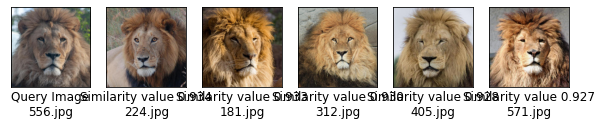

In [8]:
inputImages = ['556.jpg']
for image in inputImages:
    plotSimilarImages(image, similarNames, similarValues)